In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## Load in the data

In [3]:
filename = "../../../../cscratch1/sd/jupiter/sim2_z3_FGPA_cgs.h5"

h5 = h5py.File(filename,'r')

## Plot cross-sections

In [38]:
# take a cross-section parallel to the yz-plane
ind = 42

rhob = h5['native_fields']['baryon_density'][ind,...]
temp = h5['native_fields']['temperature'][ind,...]
vel = h5['native_fields']['velocity_z'][ind,...]

treal = h5['derived_fields']['tau_real'][ind,...]
tred = h5['derived_fields']['tau_red'][ind,...]
n_hi = h5['derived_fields']['HI_number_density'][ind,...]

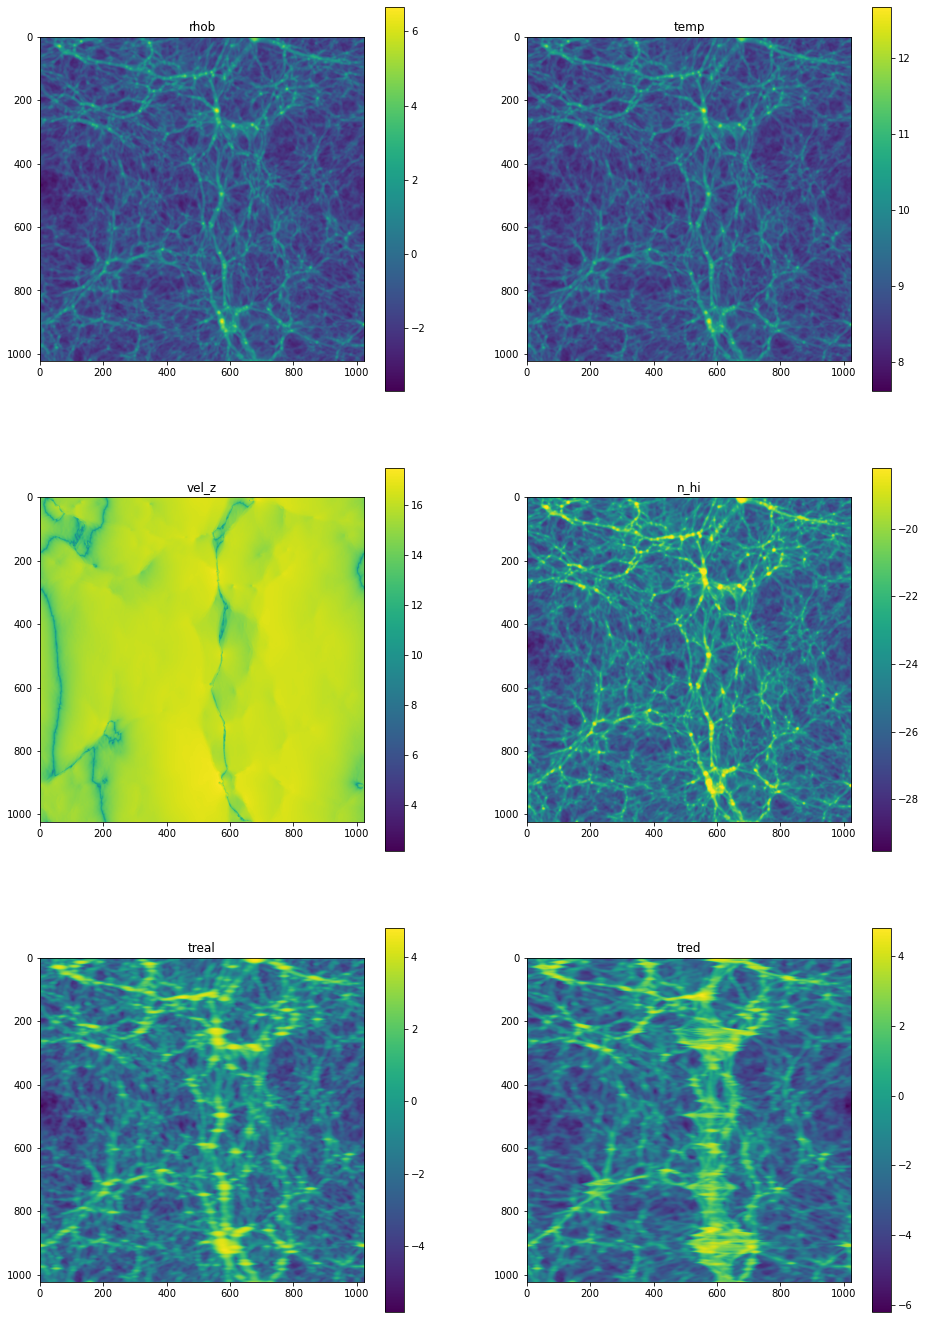

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(16,24))

im1 = axes[0,0].imshow(np.log(rhob))
axes[0,0].set_title("rhob")
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(np.log(temp))
axes[0,1].set_title("temp")
fig.colorbar(im2, ax=axes[0,1])

im3 = axes[1,0].imshow(np.log(np.abs(vel)))
axes[1,0].set_title("vel_z")
fig.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(np.log(n_hi))
axes[1,1].set_title("n_hi")
fig.colorbar(im4, ax=axes[1,1])

im5 = axes[2,0].imshow(np.log(treal))
axes[2,0].set_title("treal")
fig.colorbar(im5, ax=axes[2,0])

im6 = axes[2,1].imshow(np.log(tred))
axes[2,1].set_title("tred")
fig.colorbar(im6, ax=axes[2,1])

plt.show()

In [42]:
h5.close()

## Exploring the file's properties

In [48]:
# none of the objects have attributes
def print_attrs(name, object):
    print(object.attrs)
    
h5.visititems(print_attrs)

<Attributes of HDF5 object at 46913298275760>
<Attributes of HDF5 object at 46913325631744>
<Attributes of HDF5 object at 46913325632144>
<Attributes of HDF5 object at 46913325631984>
<Attributes of HDF5 object at 46913298275760>
<Attributes of HDF5 object at 46913325632304>
<Attributes of HDF5 object at 46913325631744>
<Attributes of HDF5 object at 46913325632464>
<Attributes of HDF5 object at 46913325631984>
<Attributes of HDF5 object at 46913325632304>
<Attributes of HDF5 object at 46913298275760>
<Attributes of HDF5 object at 46913298275760>
<Attributes of HDF5 object at 46913325631744>
<Attributes of HDF5 object at 46913325632464>
<Attributes of HDF5 object at 46913325631984>
<Attributes of HDF5 object at 46913325632304>
<Attributes of HDF5 object at 46913325631744>
<Attributes of HDF5 object at 46913325632464>
<Attributes of HDF5 object at 46913325631984>
<Attributes of HDF5 object at 46913325632304>
<Attributes of HDF5 object at 46913325631744>
<Attributes of HDF5 object at 4691

In [31]:
# print the dataset names
for key in h5.keys():
    temp = h5[key]
    print(f'Datasets in {temp.name}: {list(temp.keys())}\n')

Datasets in /aux_fields: ['DM_vx', 'DM_vy', 'DM_vz']

Datasets in /derived_fields: ['HI_number_density', 'flux_real', 'flux_red', 'tau_real', 'tau_red']

Datasets in /domain: []

Datasets in /native_fields: ['baryon_density', 'matter_density', 'particle_vx', 'particle_vy', 'particle_vz', 'temperature', 'velocity_x', 'velocity_y', 'velocity_z']

Datasets in /universe: []



In [38]:
# all datasets are 1024^3
h5['native_fields']['velocity_x'].shape

(1024, 1024, 1024)